🎮 KEY METRICS FOR GAME PRODUCT MANAGERS
Para executar os dashboards, chame as funções individualmente:
- dashboard_1_cohort_analysis()
- dashboard_2_monetization_ltv()
- dashboard_3_ab_test()
- dashboard_4_game_balance()
- dashboard_5_feature_impact()

Ou execute todos de uma vez:
- executar_todos_dashboards()
🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮
GAME PRODUCT MANAGEMENT
Company XYZ Studios - New Puzzle Game
🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮🎮

📊 DASHBOARD 1: COHORT RETENTION ANALYSIS
--------------------------------------------------
📈 RETENTION RATES
   D0: 100.0%
   D1: 60.3%
   D7: 25.8%
   D14: 0.0%
   D30: 0.0%


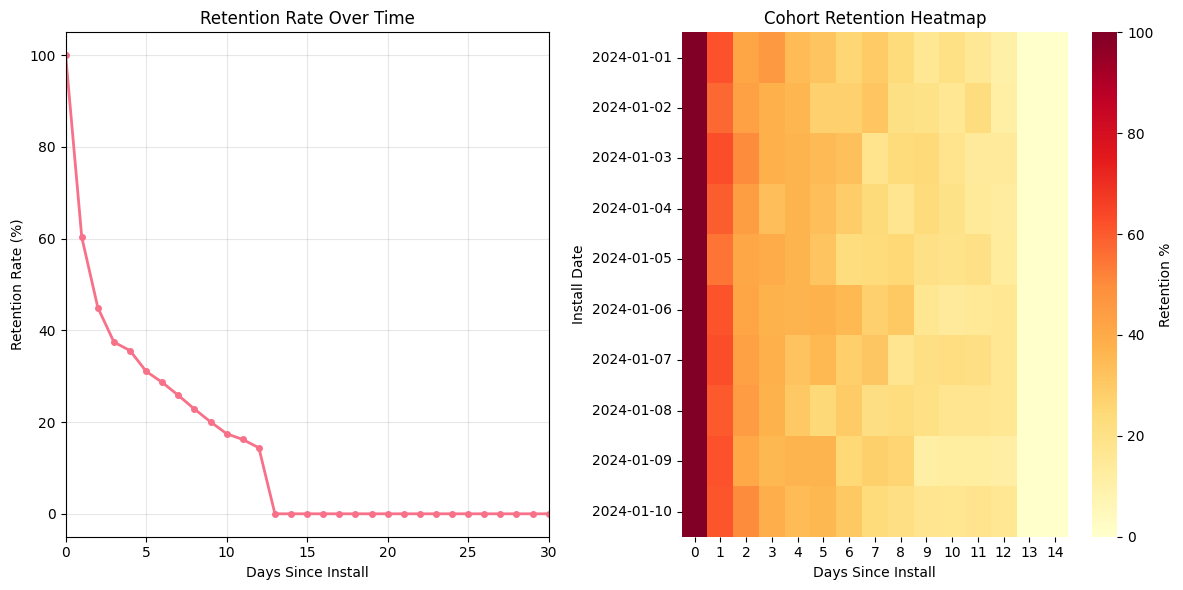


💡 INSIGHTS:
   ⚠️  D7 Retention (25.8%) preocupante - core loop pode estar fraco
Dashboard 1: Done ✅

💰 DASHBOARD 2: MONETIZATION & LTV ANALYSIS
--------------------------------------------------
📊 DISTRIBUIÇÃO DE JOGADORES POR SEGMENTO:
   WHALE: 100 players (1.0%)
      Avg Spend: $342.86, Total Revenue: $34,286
      Avg Active Days: 29.7
   DOLPHIN: 500 players (5.0%)
      Avg Spend: $54.99, Total Revenue: $27,497
      Avg Active Days: 23.0
   MINNOW: 1500 players (15.0%)
      Avg Spend: $8.89, Total Revenue: $13,338
      Avg Active Days: 17.0
   FREE: 7900 players (79.0%)
      Avg Spend: $0.00, Total Revenue: $0
      Avg Active Days: 9.0

💡 MÉTRICAS CHAVE:
   Total Revenue: $75,121
   ARPPU (Average Revenue Per Paying User): $38.94
   Conversion Rate: 19.29%
   ARPDAU: $0.675

📈 LTV POR SEGMENTO:
   DOLPHIN: $54.99
   FREE: $0.00
   MINNOW: $8.89
   WHALE: $342.86


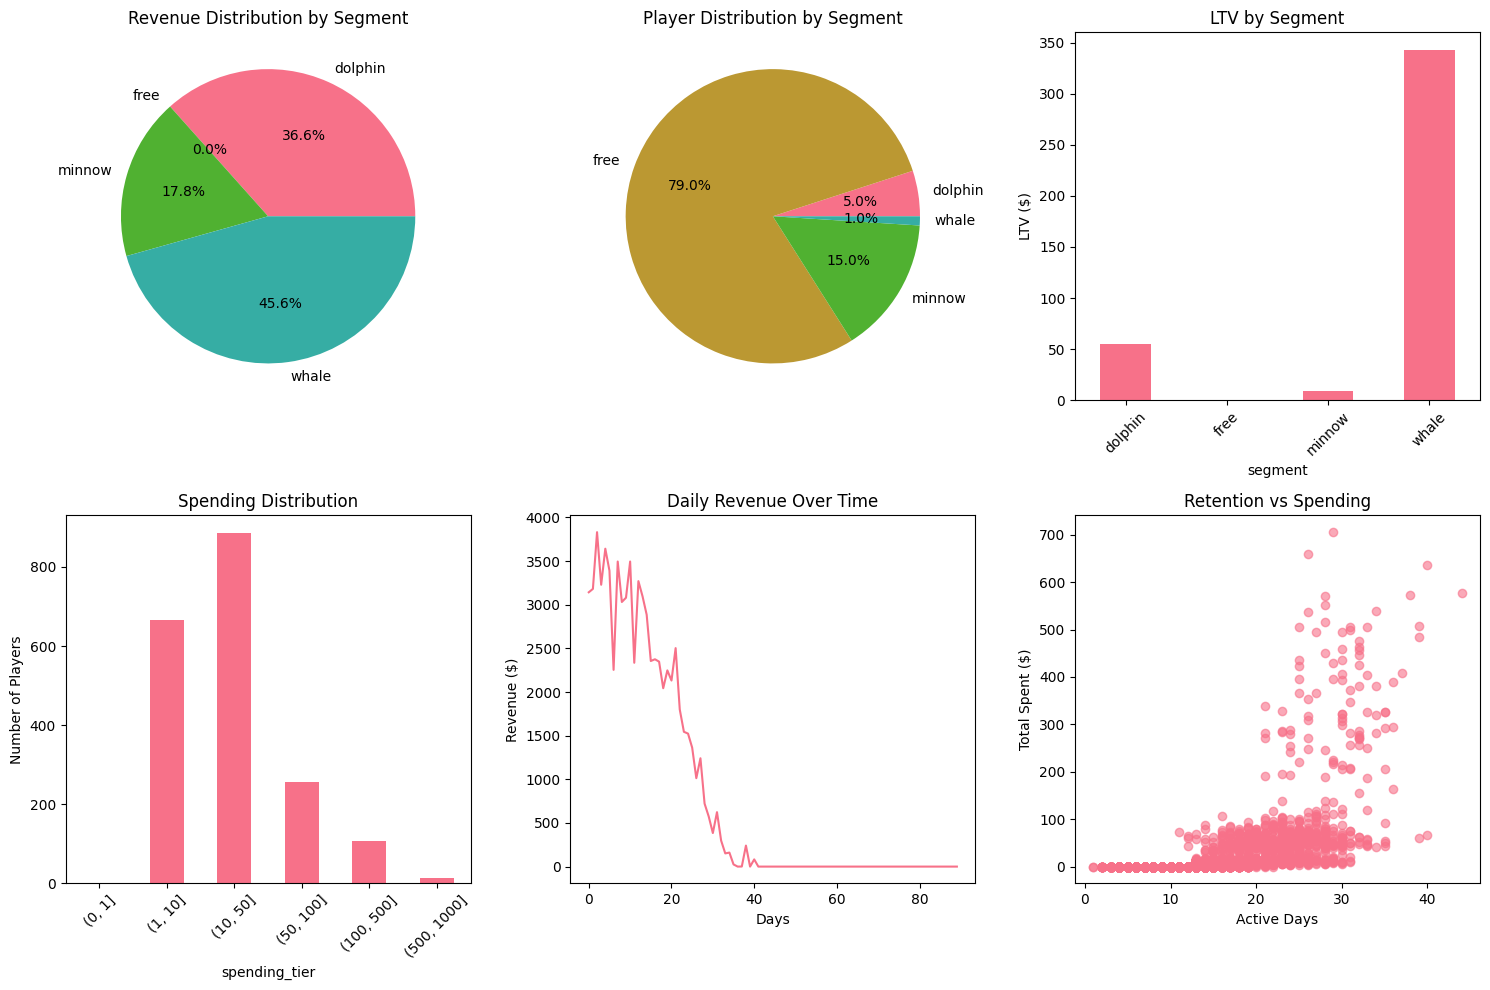

Dashboard 2: Done ✅


In [3]:
# ========================================
# GAME PRODUCT MANAGEMENT
# Company XYZ Studios - New Puzzle Game
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizações
plt.style.use('default')
sns.set_palette("husl")

print("🎮 KEY METRICS FOR GAME PRODUCT MANAGERS")
print("=" * 60)


# ========================================
# DASHBOARD 1: ANÁLISE DE COHORT RETENTION
# ========================================
def dashboard_1_cohort_analysis():
    '''
    Simula análise de cohort para medir retention de jogadores
    Skill demonstrada: Análise de Retenção, Cohort Analysis, Data Manipulation
    '''
    print("\n📊 DASHBOARD 1: COHORT RETENTION ANALYSIS")
    print("-" * 50)

    # Simular dados de jogadores
    np.random.seed(42)
    n_players = 10000

    # Criar dataset de jogadores
    start_date = datetime(2024, 1, 1)
    dates = [start_date + timedelta(days=x) for x in range(90)]

    players_data = []
    for i in range(n_players):
        # Data do primeiro login (install)
        install_date = np.random.choice(dates[:60]) # Installs nos primeiros 60 dias

        # Simular retention baseado em curva realística
        # D1: 60%, D7: 35%, D14: 25%, D30: 15%
        retention_probs = [0.6, 0.45, 0.38, 0.35, 0.32, 0.28, 0.25, 0.22, 0.20, 0.18, 0.16, 0.15]
        

        player_sessions = [install_date] # Sempre tem sessão no D0

        '''
        for day in range(1, min(31, (dates[-1] - install_date).date)):
            if day <= len(retention_probs):
                if np.random.random() < retention_probs[day-1]:
                    player_sessions.append(install_date + timedelta(days=day))
        '''
        days_diff = (dates[-1] - install_date).days
        for day in range(1, min(31, days_diff + 1)):
            if day <= len(retention_probs):
                if np.random.random() < retention_probs[day-1]:
                    player_sessions.append(install_date + timedelta(days=day))        

        players_data.append({
            'player_id': f'player_{i}',
            'install_date': install_date,
            'sessions': player_sessions
        })

    # Converter para DataFrame de sessões
    session_rows = []
    for player in players_data:
        for session_date in player['sessions']:
            days_since_install = (session_date - player['install_date']).days
            session_rows.append({
                'player_id': player['player_id'],
                'install_date': player['install_date'].strftime('%Y-%m-%d'),
                'session_date': session_date.strftime('%Y-%m-%d'),
                'days_since_install': days_since_install
            })

    df_sessions = pd.DataFrame(session_rows)
    
    # Calcular retention por cohort
    cohort_data = []
    for install_date in df_sessions['install_date'].unique():
        cohort_players = df_sessions[df_sessions['install_date'] == install_date]
        total_players = cohort_players['player_id'].nunique()
        
        for day in range(0, 31):
            players_day_x = cohort_players[
                cohort_players['days_since_install'] == day
            ]['player_id'].nunique()
            
            retention_rate = (players_day_x / total_players) * 100
            
            cohort_data.append({
                'install_date': install_date,
                'day': f'D{day}',
                'day_num': day,
                'retained_players': players_day_x,
                'total_players': total_players,
                'retention_rate': retention_rate
            })
    
    df_cohort = pd.DataFrame(cohort_data)
    
    # Análise agregada
    retention_summary = df_cohort.groupby('day_num').agg({
        'retention_rate': 'mean',
        'retained_players': 'sum',
        'total_players': 'sum'
    }).reset_index()
    
    print("📈 RETENTION RATES")
    key_days = [0, 1, 7, 14, 30]
    for day in key_days:
        if day in retention_summary['day_num'].values:
            rate = retention_summary[retention_summary['day_num'] == day]['retention_rate'].iloc[0]
            print(f"   D{day}: {rate:.1f}%")
    
    # Visualização
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(retention_summary['day_num'], retention_summary['retention_rate'], marker='o', linewidth=2, markersize=4)
    plt.title('Retention Rate Over Time')
    plt.xlabel('Days Since Install')
    plt.ylabel('Retention Rate (%)')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 30)
    
    # Heatmap de cohorts
    plt.subplot(1, 2, 2)
    pivot_cohort = df_cohort.pivot_table(
        index='install_date', 
        columns='day_num', 
        values='retention_rate'
    ).iloc[:10, :15]  # Primeiras 10 cohorts, primeiros 15 dias
    
    sns.heatmap(pivot_cohort, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Retention %'})
    plt.title('Cohort Retention Heatmap')
    plt.ylabel('Install Date')
    plt.xlabel('Days Since Install')
    
    plt.tight_layout()
    plt.show()
    
    # Insights de PM
    print("\n💡 INSIGHTS:")
    d1_retention = retention_summary[retention_summary['day_num'] == 1]['retention_rate'].iloc[0]
    d7_retention = retention_summary[retention_summary['day_num'] == 7]['retention_rate'].iloc[0]
    
    if d1_retention < 50:
        print(f"   ⚠️  D1 Retention ({d1_retention:.1f}%) está baixa - revisar onboarding")
    if d7_retention < 30:
        print(f"   ⚠️  D7 Retention ({d7_retention:.1f}%) preocupante - core loop pode estar fraco")
    
    return df_cohort, retention_summary


# ========================================
# DASHBOARD 2: ANÁLISE DE MONETIZAÇÃO E LTV
# ========================================
def dashboard_2_monetization_ltv():
    '''
    Calcula LTV, ARPDAU, e analisa comportamento de monetização
    Skill demonstrada: Análise financeira, segmentação de usuários
    '''
    print("\n💰 DASHBOARD 2: MONETIZATION & LTV ANALYSIS")
    print("-" * 50)

    # Simular dados de compras
    np.random.seed(123)

    # Gerar jogadores com diferentes perfis de gasto
    player_segments = {
        'whale': {'prob': 0.01, 'avg_spend': 200, 'frequency': 0.3},
        'dolphin': {'prob': 0.05, 'avg_spend': 50, 'frequency': 0.15},
        'minnow': {'prob': 0.15, 'avg_spend': 10, 'frequency': 0.08},
        'free': {'prob': 0.79, 'avg_spend': 0, 'frequency': 0}
    }

    players = []
    player_id = 0

    for segment, config in player_segments.items():
        n_players = int(10000 * config['prob'])

        for i in range(n_players):
            # Dias ativos (baseado em retention)
            if segment == 'whale':
                active_days = np.random.poisson(25) + 5 # Whales jogam mais
            elif segment == 'dolphin':
                active_days = np.random.poisson(20) + 3
            elif segment == 'minnow':
                active_days = np.random.poisson(15) + 2
            else:
                active_days = np.random.poisson(8) + 1

            active_days = min(active_days, 90) # Cap em 90 dias

            # Gerar compras
            purchases = []
            if config['avg_spend'] > 0:
                n_purchase_days = int(active_days * config['frequency'])
                purchase_days = np.random.choice(active_days, size=min(n_purchase_days, active_days), replace=False)

                for day in purchase_days:
                    # Valor da compra varia em torno da média
                    purchase_value = max(0.99, np.random.normal(config['avg_spend'] / n_purchase_days if n_purchase_days > 0 else 0, config['avg_spend'] * 0.3))
                    purchases.append({
                        'day': day,
                        'value': purchase_value
                    })

            players.append({
                'player_id': player_id,
                'segment': segment,
                'active_days': active_days,
                'purchases': purchases,
                'total_spent': sum([p['value'] for p in purchases])
            })
            player_id += 1

    # Converter para DataFrame
    df_players = pd.DataFrame(players)
    
    # Análise de monetização
    print("📊 DISTRIBUIÇÃO DE JOGADORES POR SEGMENTO:")
    segment_analysis = df_players.groupby('segment').agg({
        'player_id': 'count',
        'total_spent': ['sum', 'mean'],
        'active_days': 'mean'
    }).round(2)
    
    for segment in player_segments.keys():
        if segment in segment_analysis.index:
            count = segment_analysis.loc[segment, ('player_id', 'count')]
            avg_spend = segment_analysis.loc[segment, ('total_spent', 'mean')]
            total_revenue = segment_analysis.loc[segment, ('total_spent', 'sum')]
            avg_days = segment_analysis.loc[segment, ('active_days', 'mean')]
    
            print(f"   {segment.upper()}: {count} players ({count/len(df_players)*100:.1f}%)")
            print(f"      Avg Spend: ${avg_spend:.2f}, Total Revenue: ${total_revenue:,.0f}")
            print(f"      Avg Active Days: {avg_days:.1f}")

    # Calcular métricas agregadas
    total_revenue = df_players['total_spent'].sum()
    total_players = len(df_players)
    paying_players = len(df_players[df_players['total_spent'] > 0])
    
    # ARPDAU (assumindo 90 dias de análise)
    total_dau = df_players['active_days'].sum() # DAU * dias
    arpdau = total_revenue / total_dau
    
    # LTV por segmento
    ltv_by_segment = df_players.groupby('segment')['total_spent'].mean()
    
    print(f"\n💡 MÉTRICAS CHAVE:")
    print(f"   Total Revenue: ${total_revenue:,.0f}")
    print(f"   ARPPU (Average Revenue Per Paying User): ${total_revenue/paying_players:.2f}")
    print(f"   Conversion Rate: {paying_players/total_players*100:.2f}%")
    print(f"   ARPDAU: ${arpdau:.3f}")
    
    print(f"\n📈 LTV POR SEGMENTO:")
    for segment, ltv in ltv_by_segment.items():
        print(f"   {segment.upper()}: ${ltv:.2f}")

    # Visualizações
    plt.figure(figsize=(15, 10))

    # Revenue distribution
    plt.subplot(2, 3, 1)
    revenue_by_segment = df_players.groupby('segment')['total_spent'].sum()
    plt.pie(revenue_by_segment.values, labels=revenue_by_segment.index, autopct='%1.1f%%')
    plt.title('Revenue Distribution by Segment')

    # Player distribution
    plt.subplot(2, 3, 2)
    player_by_segment = df_players.groupby('segment').size()
    plt.pie(player_by_segment.values, labels=player_by_segment.index, autopct='%1.1f%%')
    plt.title('Player Distribution by Segment')
    
    # LTV by segment
    plt.subplot(2, 3, 3)
    ltv_by_segment.plot(kind='bar')
    plt.title('LTV by Segment')
    plt.ylabel('LTV ($)')
    plt.xticks(rotation=45)
    
    # Spending distribution
    plt.subplot(2, 3, 4)
    spending_bins = [0, 1, 10, 50, 100, 500, 1000]
    df_players['spending_tier'] = pd.cut(df_players['total_spent'], bins=spending_bins)
    spending_dist = df_players['spending_tier'].value_counts().sort_index()
    spending_dist.plot(kind='bar')
    plt.title('Spending Distribution')
    plt.ylabel('Number of Players')
    plt.xticks(rotation=45)
    
    # Revenue over time simulation
    plt.subplot(2, 3, 5)
    daily_revenue = []
    for day in range(90):
        day_revenue = 0
        for _, player in df_players.iterrows():
            for purchase in player['purchases']:
                if purchase['day'] == day:
                    day_revenue += purchase['value']
        daily_revenue.append(day_revenue)
    
    plt.plot(range(90), daily_revenue)
    plt.title('Daily Revenue Over Time')
    plt.xlabel('Days')
    plt.ylabel('Revenue ($)')
    
    # Retention vs Spending
    plt.subplot(2, 3, 6)
    plt.scatter(df_players['active_days'], df_players['total_spent'], alpha=0.6)
    plt.xlabel('Active Days')
    plt.ylabel('Total Spent ($)')
    plt.title('Retention vs Spending')
    
    plt.tight_layout()
    plt.show()
    
    return df_players


# ========================================
# EXECUTAR TODOS OS DASHBOARDS
# ========================================
def executar_todos_dashboards():
    """
    Executa todos os dashboards em sequência
    """
    print("🎮" * 20)
    print("GAME PRODUCT MANAGEMENT")
    print("Company XYZ Studios - New Puzzle Game")
    print("🎮" * 20)
    
    # Dashboard 1: Cohort Analysis
    try:
        cohort_data, retention_summary = dashboard_1_cohort_analysis()
        print("Dashboard 1: Done ✅")
    except Exception as e:
        print(f"❌ Erro no Dashboard 1: {e}")


    # Dashboard 2: Monetization & LTV
    try:
        players_data = dashboard_2_monetization_ltv()
        print("Dashboard 2: Done ✅")
    except Exception as e:
        print(f"❌ Erro no Dashboard 2: {e}")


# ========================================
# INSTRUÇÕES DE USO
# ========================================
if __name__ == "__main__":
    print("Para executar os dashboards, chame as funções individualmente:")
    print("- dashboard_1_cohort_analysis()")
    print("- dashboard_2_monetization_ltv()")
    print("- dashboard_3_ab_test()")
    print("- dashboard_4_game_balance()")
    print("- dashboard_5_feature_impact()")
    print("\nOu execute todos de uma vez:")
    print("- executar_todos_dashboards()")
    
    # Executar automaticamente para demonstração
    executar_todos_dashboards()